This notebook generates the figure illustrating LLM one-step prediction performance against repeat-based baselines, as described in Supplementary Material Section 7.

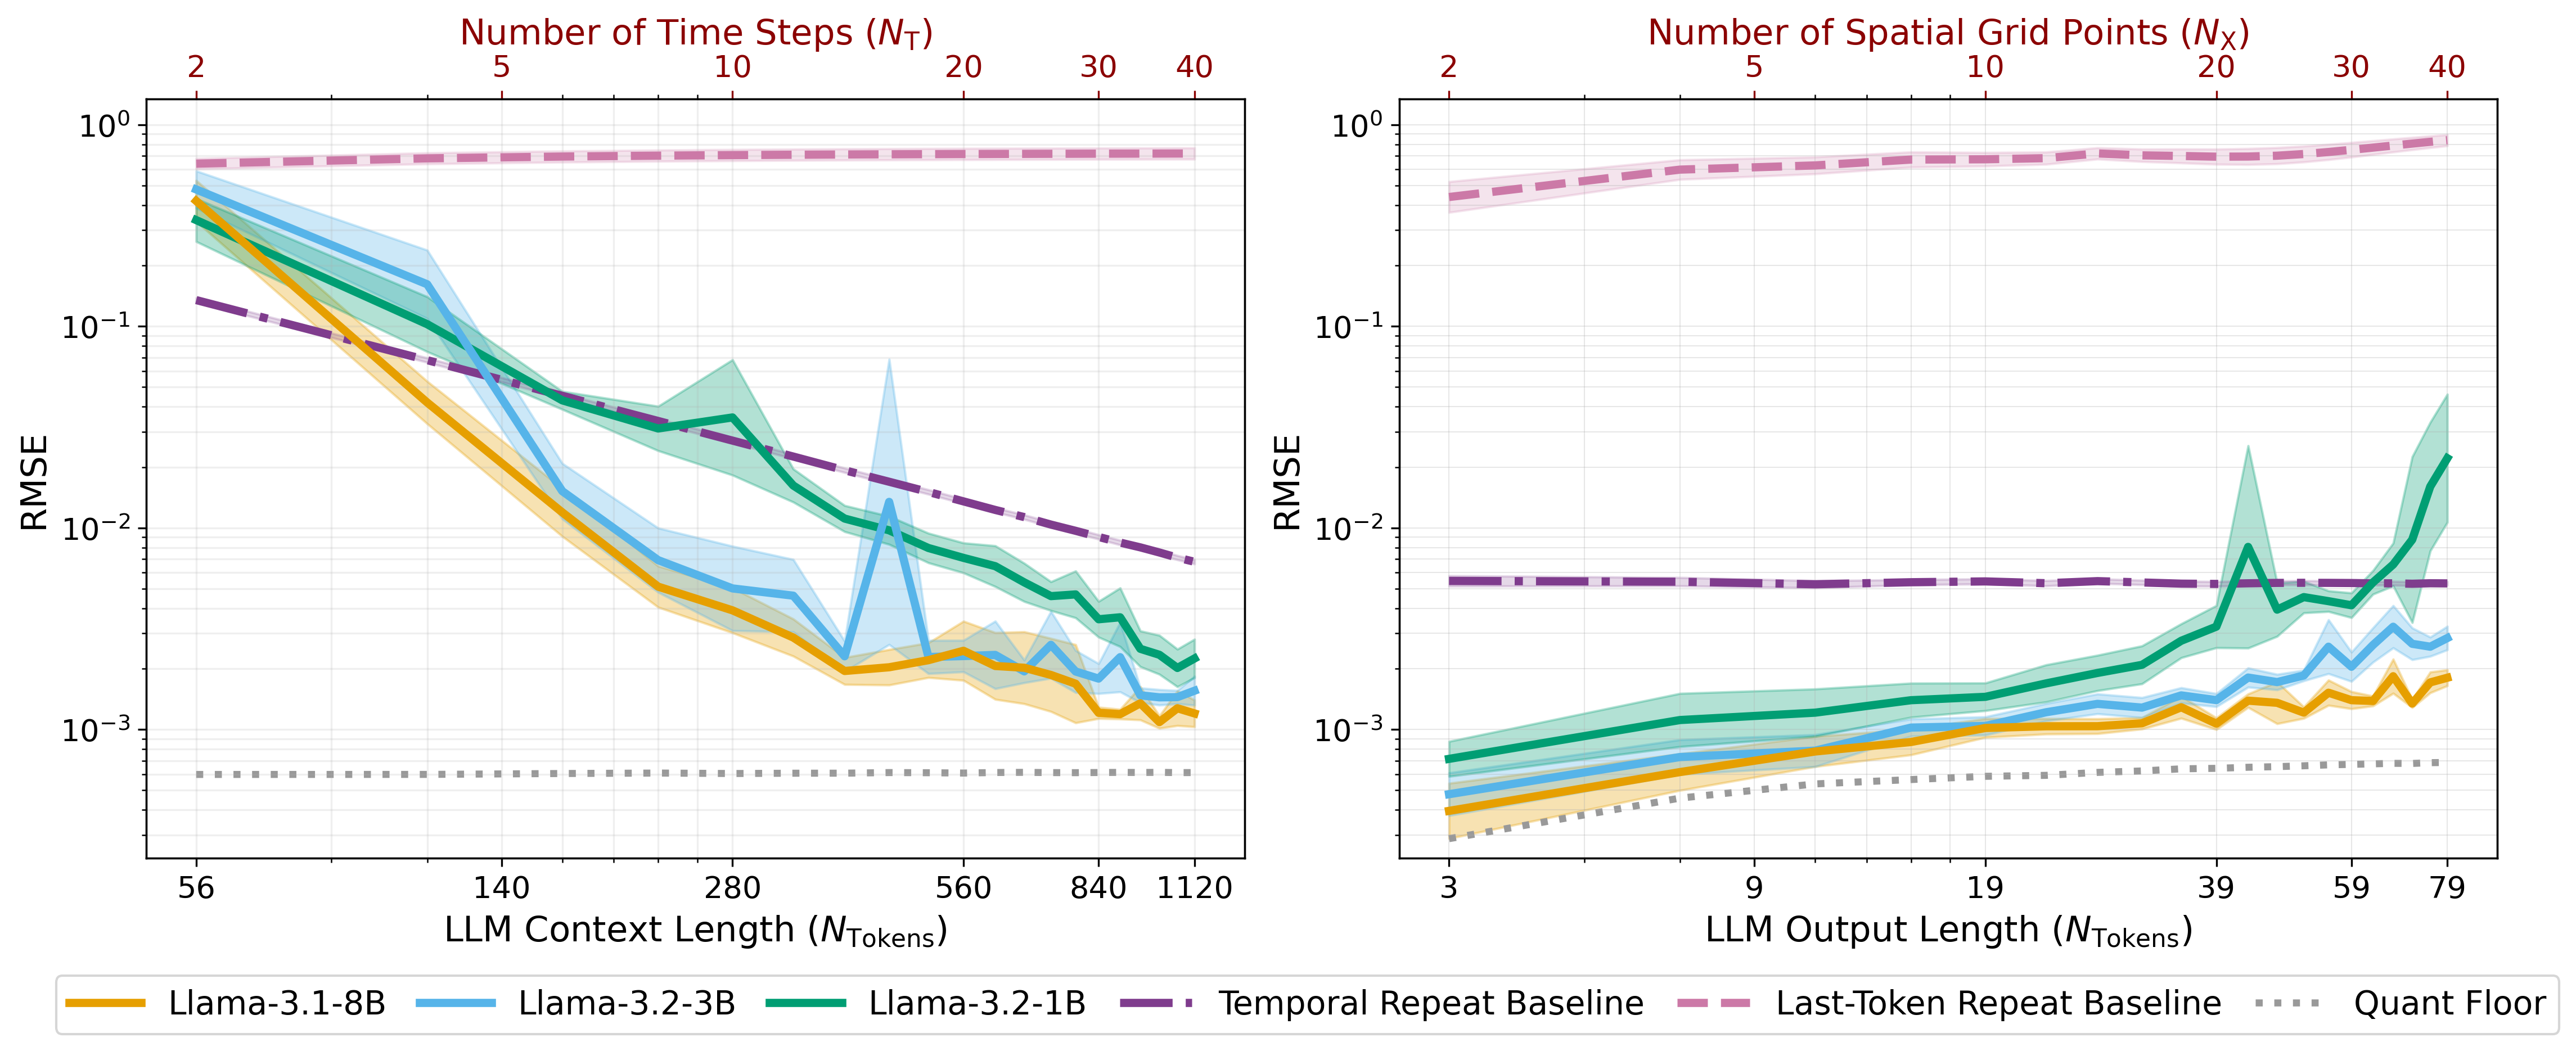

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

colors = [
    "#E69F00",  # Llama-3.1-8B 
    "#56B4E9",  # Llama-3.2-3B
    "#009E73",  # Llama-3.2-1B
    "#CC79A7",  # Last-Token Repeat Baseline
    "#999999",  # Quant Floor
    "#7F3C8D",  # Temporal Repeat Baseline
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), dpi=300)

# Left plot: RMSE vs Context Length
with np.load("8B_1_step_time_discretization.npz") as data_8b_time:
    llm_final_rmse_time = data_8b_time["llm_final_rmse_8B"]
    lower_rmse_time = data_8b_time["llm_lower_rmse_log_8B"]
    upper_rmse_time = data_8b_time["llm_upper_rmse_log_8B"]
    temporal_baseline_rmse_errors = data_8b_time["temporal_baseline_rmse_errors"]

with np.load("3B_1_step_time_discretization.npz") as data_3b_time:
    llm_final_rmse_3B_time = data_3b_time["llm_final_rmse_3B"]
    lower_rmse_3B_time = data_3b_time["llm_lower_rmse_log_3B"]
    upper_rmse_3B_time = data_3b_time["llm_upper_rmse_log_3B"]

with np.load("1B_1_step_time_discretization.npz") as data_1b_time:
    llm_final_rmse_1B_time = data_1b_time["llm_final_rmse_1B"]
    lower_rmse_1B_time = data_1b_time["llm_lower_rmse_log_1B"]
    upper_rmse_1B_time = data_1b_time["llm_upper_rmse_log_1B"]

with np.load("baseline_1_step_time_discretization.npz") as data_baseline_time:
    persistence_final_rmse_time = data_baseline_time["persistence_final_rmse"]
    persistence_lower_rmse_time = data_baseline_time["persistence_lower_rmse_log"]
    persistence_upper_rmse_time = data_baseline_time["persistence_upper_rmse_log"]
    
    repeat_last_final_rmse_time = data_baseline_time["repeat_last_final_rmse"]
    repeat_last_lower_rmse_time = data_baseline_time["repeat_last_lower_rmse_log"]
    repeat_last_upper_rmse_time = data_baseline_time["repeat_last_upper_rmse_log"]

all_Nt_values = range(2, 41, 2)

ax1.loglog(all_Nt_values, llm_final_rmse_time, '-', label='Llama-3.1-8B',
           color=colors[0], linewidth=3.5, zorder=8)
ax1.fill_between(all_Nt_values, lower_rmse_time, upper_rmse_time,
                 alpha=0.3, color=colors[0])
ax1.loglog(all_Nt_values, llm_final_rmse_3B_time, '-', label='Llama-3.2-3B',
           color=colors[1], linewidth=3.5, zorder=7)
ax1.fill_between(all_Nt_values, lower_rmse_3B_time, upper_rmse_3B_time,
                 alpha=0.3, color=colors[1])
ax1.loglog(all_Nt_values, llm_final_rmse_1B_time, '-', label='Llama-3.2-1B',
           color=colors[2], linewidth=3.5, zorder=6)
ax1.fill_between(all_Nt_values, lower_rmse_1B_time, upper_rmse_1B_time,
                 alpha=0.3, color=colors[2])
ax1.loglog(all_Nt_values, persistence_final_rmse_time, '-.', label='Temporal Repeat Baseline',
           color=colors[5], linewidth=3.5, zorder=3)
ax1.fill_between(all_Nt_values, persistence_lower_rmse_time, persistence_upper_rmse_time,
                 alpha=0.2, color=colors[5])
ax1.loglog(all_Nt_values, repeat_last_final_rmse_time, '--', label='Last-Token Repeat Baseline',
           color=colors[3], linewidth=3.5, zorder=2)
ax1.fill_between(all_Nt_values, repeat_last_lower_rmse_time, repeat_last_upper_rmse_time,
                 alpha=0.2, color=colors[3])
ax1.loglog(all_Nt_values, temporal_baseline_rmse_errors, ':',
           color=colors[4], linewidth=3, label='Quant Floor', zorder=1)

ax1.set_xlabel("LLM Context Length ($N_{\\text{Tokens}}$)", fontsize=15)
ax1.set_ylabel("RMSE", fontsize=15)

# Right plot: RMSE vs Output Length
with np.load("8B_1_step_space_discretization.npz") as data_8b_space:
    llm_final_rmse_space = data_8b_space["llm_final_rmse_8B"]
    lower_rmse_space = data_8b_space["llm_lower_rmse_log_8B"]
    upper_rmse_space = data_8b_space["llm_upper_rmse_log_8B"]
    spatial_baseline_rmse_errors = data_8b_space["spatial_baseline_rmse_errors"]

with np.load("3B_1_step_space_discretization.npz") as data_3b_space:
    llm_final_rmse_3B_space = data_3b_space["llm_final_rmse_3B"]
    lower_rmse_3B_space = data_3b_space["llm_lower_rmse_log_3B"]
    upper_rmse_3B_space = data_3b_space["llm_upper_rmse_log_3B"]

with np.load("1B_1_step_space_discretization.npz") as data_1b_space:
    llm_final_rmse_1B_space = data_1b_space["llm_final_rmse_1B"]
    lower_rmse_1B_space = data_1b_space["llm_lower_rmse_log_1B"]
    upper_rmse_1B_space = data_1b_space["llm_upper_rmse_log_1B"]

with np.load("baseline_1_step_space_discretization.npz") as data_baseline_space:
    persistence_final_rmse_space = data_baseline_space["persistence_final_rmse"]
    persistence_lower_rmse_space = data_baseline_space["persistence_lower_rmse_log"]
    persistence_upper_rmse_space = data_baseline_space["persistence_upper_rmse_log"]
    
    repeat_last_final_rmse_space = data_baseline_space["repeat_last_final_rmse"]
    repeat_last_lower_rmse_space = data_baseline_space["repeat_last_lower_rmse_log"]
    repeat_last_upper_rmse_space = data_baseline_space["repeat_last_upper_rmse_log"]

all_Nx_values = range(2, 41, 2)

ax2.loglog(all_Nx_values, llm_final_rmse_space, '-', label='Llama-3.1-8B',
           color=colors[0], linewidth=3.5, zorder=8)
ax2.fill_between(all_Nx_values, lower_rmse_space, upper_rmse_space, 
                 alpha=0.3, color=colors[0])
ax2.loglog(all_Nx_values, llm_final_rmse_3B_space, '-', label='Llama-3.2-3B',
           color=colors[1], linewidth=3.5, zorder=7)
ax2.fill_between(all_Nx_values, lower_rmse_3B_space, upper_rmse_3B_space, 
                 alpha=0.3, color=colors[1])
ax2.loglog(all_Nx_values, llm_final_rmse_1B_space, '-', label='Llama-3.2-1B',
           color=colors[2], linewidth=3.5, zorder=6)
ax2.fill_between(all_Nx_values, lower_rmse_1B_space, upper_rmse_1B_space, 
                 alpha=0.3, color=colors[2])
ax2.loglog(all_Nx_values, persistence_final_rmse_space, '-.', label='Temporal Repeat Baseline',
           color=colors[5], linewidth=3.5, zorder=3)
ax2.fill_between(all_Nx_values, persistence_lower_rmse_space, persistence_upper_rmse_space,
                 alpha=0.2, color=colors[5])
ax2.loglog(all_Nx_values, repeat_last_final_rmse_space, '--', label='Last-Token Repeat Baseline',
           color=colors[3], linewidth=3.5, zorder=3)
ax2.fill_between(all_Nx_values, repeat_last_lower_rmse_space, repeat_last_upper_rmse_space,
                 alpha=0.2, color=colors[3])
ax2.loglog(all_Nx_values, spatial_baseline_rmse_errors, ':', 
           color=colors[4], linewidth=3, label='Quant Floor', zorder=1)

ax2.set_xlabel("LLM Output Length ($N_{\\text{Tokens}}$)", fontsize=15)
ax2.set_ylabel("RMSE", fontsize=15)

# Set consistent y limits for both plots
y_values_combined = [
    np.min(lower_rmse_time), np.min(lower_rmse_3B_time), np.min(lower_rmse_1B_time),
    np.min(persistence_final_rmse_time), np.min(repeat_last_final_rmse_time),
    np.min(temporal_baseline_rmse_errors),
    np.max(upper_rmse_time), np.max(upper_rmse_3B_time), np.max(upper_rmse_1B_time),
    np.max(persistence_final_rmse_time), np.max(repeat_last_final_rmse_time),
    np.max(temporal_baseline_rmse_errors),
    np.min(lower_rmse_space), np.min(lower_rmse_3B_space), np.min(lower_rmse_1B_space),
    np.min(persistence_final_rmse_space), np.min(repeat_last_final_rmse_space),
    np.min(spatial_baseline_rmse_errors),
    np.max(upper_rmse_space), np.max(upper_rmse_3B_space), np.max(upper_rmse_1B_space),
    np.max(persistence_final_rmse_space), np.max(repeat_last_final_rmse_space),
    np.max(spatial_baseline_rmse_errors),
]
y_min = np.min(y_values_combined) * 0.8
y_max = np.max(y_values_combined) * 1.6
ax1.set_ylim(y_min, y_max)
ax2.set_ylim(y_min, y_max)

key_ticks = [2, 5, 10, 20, 30, 40]
token_ticks = [nt * 28 for nt in key_ticks]
ax1.set_xticks(key_ticks)
ax1.set_xticklabels(token_ticks)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.grid(True, which="both", ls="-", alpha=0.2)

ax1_top = ax1.twiny()
ax1_top.set_xlim(ax1.get_xlim())
ax1_top.set_xscale('log')
ax1_top.set_xticks(key_ticks)
ax1_top.set_xticklabels(key_ticks)
ax1_top.set_xlabel("Number of Time Steps ($N_\\text{T}$)", fontsize=15, color='darkred')
ax1_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')

token_ticks_spatial = [2*nx - 1 for nx in key_ticks]
ax2.set_xticks(key_ticks)
ax2.set_xticklabels(token_ticks_spatial)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax2.grid(True, which='both', alpha=0.3, linestyle='-', linewidth=0.5)

ax2_top = ax2.twiny()
ax2_top.set_xscale('log')
ax2_top.set_xlim(ax2.get_xlim())
ax2_top.set_xticks(key_ticks)
ax2_top.set_xticklabels(key_ticks)
ax2_top.set_xlabel("Number of Spatial Grid Points ($N_\\text{X}$)", fontsize=15, color='darkred')
ax2_top.tick_params(axis='x', which='major', labelsize=13, colors='darkred')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=6, fontsize=14, handlelength=2.2,
           bbox_to_anchor=(0.52, -0.04), columnspacing=1)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15, top=0.9)
plt.show()